# Importing Libraries and Loading Data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\SVF\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load Data
df = pd.read_csv('data.csv')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2023,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2023,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2023,2.75,17850.0,United Kingdom


# Data Cleaning and Preparation


## 1. Dataset Overview and Basic Exploration

In [3]:
df.shape

(541909, 8)

In [4]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
232599,557324,23031,DRAWER KNOB CRACKLE GLAZE PINK,4,6/20/2024,3.29,NaN,United Kingdom
369762,569097,22555,PLASTERS IN TIN STRONGMAN,24,9/30/2024,1.65,12731.0,France
65648,541696,22473,TV DINNER TRAY VINTAGE PAISLEY,4,1/20/2024,4.13,NaN,United Kingdom
276602,561066,23159,SET OF 5 PANCAKE DAY MAGNETS,1,7/24/2024,2.08,16710.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2023,1.06,16754.0,United Kingdom


In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Insights:

- **CustomerID** and **Description** columns contain **missing values**.
- **CustomerID**, **UnitPrice**, and **Quantity** are **numerical variables**.
- **InvoiceDate** should be converted to `datetime` format for accurate time-based analysis.
- All remaining columns are categorical variables.

In [6]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Insights:

- The number of unique InvoiceNo entries is much lower than the total count, indicating that multiple products are often included in a single invoice.
- The number of unique StockCode values is less than the number of unique Descriptions, suggesting that some products may have more than one description.
- The e-commerce platform serves customers in 38 different countries.



## 2. Handling Missing Values

In [7]:
# Calculate the count of null-values for each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
null_perc = round(df['CustomerID'].isnull().sum()*100 / df.shape[0],2)
print("The percentage of missing values in the CustomerID column is:", null_perc,'%')

The percentage of missing values in the CustomerID column is: 24.93 %


- Since this analysis aims to segment customers into groups, it's important to remove entries without CustomerID.
- As a result, a significant portion of the dataset will be excluded from the analysis.

In [9]:
# Removing null-values from the 'CustomerID' column
df = df.dropna(subset = ["CustomerID"])

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- Removing rows with missing CustomerID also eliminates those with missing Description

## 3. Handling Duplicate Records

In [11]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
duplicates.sum()

5226

In [12]:
# Remove duplicates, keeping the first occurence
df = df.drop_duplicates()

In [13]:
# Checking the shape after droping the duplicates
df.shape

(401603, 8)

## 4. Excluding Returned or Voided Invoices

In [14]:
# Count of rows for which quantity is less than 0
cancelled_orders = df[df['Quantity'] < 0]
print(cancelled_orders.shape[0])

8872


In [15]:
cancelled_orders.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
119002,C546517,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,3/14/2024,6.95,15308.0,United Kingdom
268312,C560409,84078A,SET/4 WHITE RETRO STORAGE CUBES,-1,7/18/2024,39.95,16717.0,United Kingdom
369959,C569114,22487,WHITE WOOD GARDEN PLANT LADDER,-1,9/30/2024,9.95,14911.0,EIRE
291671,C562514,M,Manual,-1,8/5/2024,11.95,13408.0,United Kingdom
33750,C539291,22178,VICTORIAN GLASS HANGING T-LIGHT,-3,12/16/2023,1.25,18075.0,United Kingdom


- Invoices that begin with 'C' indicate cancelled transactions.
- Although they can be analyzed separately if needed, we’ll exclude them for now to keep the focus on valid, completed orders.

In [16]:
# Removing cancelled order records 
df = df[df['Quantity'] > 0]
df.shape

(392731, 8)

## 5. In-Depth Feature Exploration

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### 5.1 Exploring Invoice No's

In [18]:
df['InvoiceNo'].nunique()

18536

In [19]:
df['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

### 5.2 Stock Codes

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2023,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2023,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2023,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2023,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2023,3.39,17850.0,United Kingdom


Based on our analysis, StockCodes fall into two categories:
- Numeric Codes – contain only numbers
- Alphanumeric Codes – contain a mix of letters and numbers

In [21]:
# Checking the numeric StockCodes
df["StockCode"] = df["StockCode"].astype(str)
df[df["StockCode"].str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2023,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2023,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2023,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2023,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2023,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2024,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2024,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2024,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2024,4.15,12680.0,France


- Out of 392,731 total StockCodes, 358,308 (91.23%) are numeric, indicating that the majority of product codes consist only of numbers.

In [22]:
# Filter for StockCodes that are entirely numeric
numeric_stockcodes = df[df['StockCode'].str.isnumeric()]

# Calculate the length of each numeric StockCode
numeric_stockcodes['Length'] = numeric_stockcodes['StockCode'].str.len()

# Group by the length and count the occurrences
length_counts = numeric_stockcodes['Length'].value_counts().sort_index()

# View the result
print(length_counts)

5    358308
Name: Length, dtype: int64


- All numeric StockCodes follow a consistent 5-digit format, indicating a standardized coding structure for these items.

In [23]:
# Checking the alphanumeric StockCodes
alphanumeric_stockcodes = df[~df["StockCode"].str.isnumeric()]
alphanumeric_stockcodes.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
305666,563706,85032D,YULETIDE IMAGES GIFT WRAP SET,12,8/18/2024,0.65,14189.0,United Kingdom
268108,560385,84510A,SET OF 4 ENGLISH ROSE COASTERS,1,7/18/2024,1.25,14583.0,United Kingdom
280366,561396,85099F,JUMBO BAG STRAWBERRY,10,7/27/2024,2.08,13458.0,United Kingdom


In [24]:
alphanumeric_stockcodes[alphanumeric_stockcodes['StockCode'].str.isalpha()]['StockCode'].unique()

array(['POST', 'M', 'PADS', 'DOT'], dtype=object)

- StockCodes such as 'POST', 'M', 'PADS', and 'DOT' represent additional charges that do not contribute to product-level analysis and can be excluded.

In [25]:
# Creating a new column which contains the length of the StockCodes
df['stock_code_len'] = df['StockCode'].str.len()
df['stock_code_len'].value_counts()

5     358308
6      32583
4       1103
7        291
1        285
2        133
3         16
12        12
Name: stock_code_len, dtype: int64

In [26]:
df[(df['stock_code_len'] < 3) | (df['stock_code_len'] > 8)]['StockCode'].unique()

array(['C2', 'M', 'BANK CHARGES'], dtype=object)

Rows with StockCodes 'CARRIAGE' and 'BANK CHARGES' were removed, as they represent service or handling fees rather than actual products, making them irrelevant for product-level analysis.

In [27]:
# Define the list of non-product StockCodes to remove
non_product_codes = ['POST', 'M', 'PADS', 'DOT', 'C2', 'BANK CHARGES']

# Drop rows with these StockCodes
df = df[~df['StockCode'].isin(non_product_codes)]

In [28]:
# Removing the stock_code_len column
df = df.drop('stock_code_len', axis=1)
df.shape

(391182, 8)

### 5.3 Quantity

In [29]:
df['Quantity'].describe()

count    391182.000000
mean         13.179694
std         181.907634
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

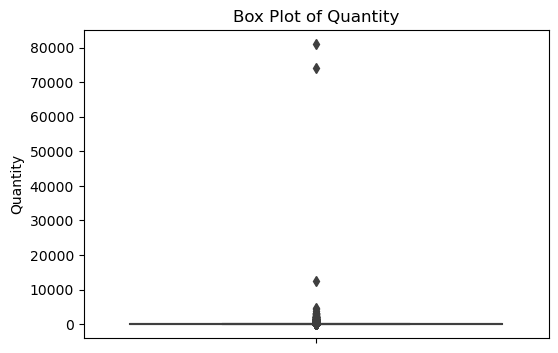

In [30]:
# Boxplot of quantity
plt.figure(figsize=(6, 4))

sns.boxplot(y=df["Quantity"])
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")

plt.show()

- There are extreme outliers in the data — the maximum quantity is approx. 80,000, which is unusually high and needs attention.

In [31]:
IQR = df['Quantity'].quantile(0.75) + 1.5*(df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25))
IQR

27.0

In [32]:
# Checking the details of the order containing maximum quantity
df[df['Quantity'] > 80000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2024,2.08,16446.0,United Kingdom


In [33]:
# Checking if this customer has orderd anything else
df[df['CustomerID'] == 16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2024,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2024,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2024,2.08,16446.0,United Kingdom


Customer 16446 placed 3 orders in total, but 2 of those orders contain only a single item each. This should be reported

In [34]:
# Excluding heavy outliers
df = df[df['Quantity'] < 100]
df.shape

(384727, 8)

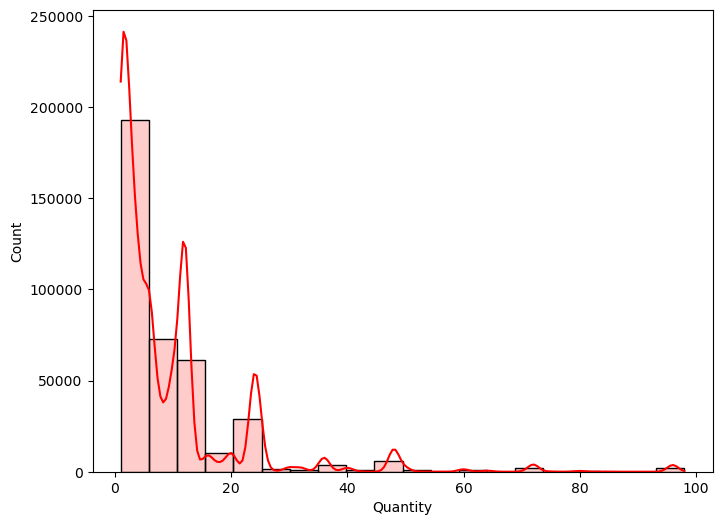

In [35]:
# Hisplot for checking the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], bins=20, kde=True, color='red', alpha=0.2)
plt.show()

### 5.4 Invoice Date

In [36]:
# Checking the dtype
print(df['InvoiceDate'].dtype)

object


In [37]:
# Changing the InvoiceDate datatype to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
# First and Last order date
print('First Order Date:', df["InvoiceDate"].min())
print('Last Order Date:', df["InvoiceDate"].max())

First Order Date: 2023-12-01 00:00:00
Last Order Date: 2024-12-09 00:00:00


### 5.5 Unit Price

In [39]:
df['UnitPrice'].describe()

count    384727.000000
mean          2.898822
std           4.312974
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

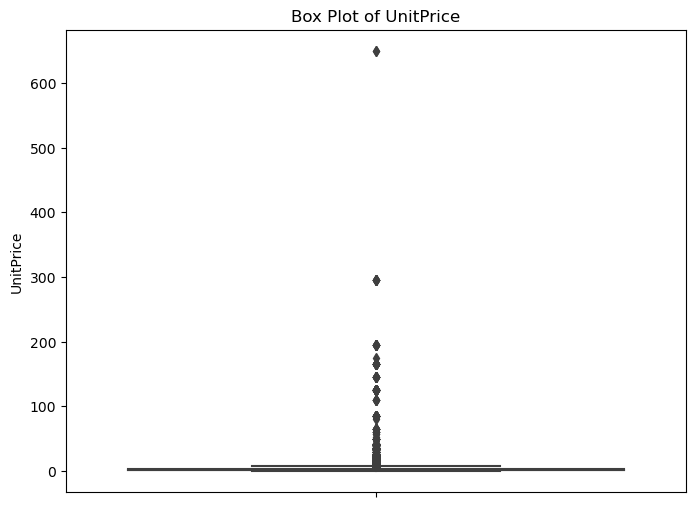

In [40]:
# Boxplot of Unit Price
plt.figure(figsize=(8,6))

sns.boxplot(y=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.ylabel('UnitPrice')

plt.show()

- An extreme outlier is present — the maximum UnitPrice recorded is more than 600, which should be flagged for further investigation.

In [41]:
# Checking the max value of UnitPrice
df[df["UnitPrice"] > 600]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2024-06-10,649.5,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2024-06-10,649.5,15098.0,United Kingdom


### 5.6 Customer Id

In [42]:
df['CustomerID'].nunique()

4284

- Our analysis shows there are 4,335 unique customers in the dataset

### 5.7 Country

In [43]:
df['Country'].nunique()

37

- There are 37 countries in total. EIRE refers to Ireland, and RSA refers to South Africa.

<br>

# Exploratory Data Analysis

In [44]:
df.shape

(384727, 8)

In [45]:
# Creating new feature 'Total Price'
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

## Time Series Analysis

### Daily Sales Over Time

In [46]:
# Extract the date from the datetime
df["InvoiceDate"] = df["InvoiceDate"].dt.date

In [47]:
daily_sales = df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
daily_sales.sample(3)

,InvoiceDate,TotalPrice
160,2024-06-23,21348.57
79,2024-03-14,19605.16
200,2024-08-09,18147.06


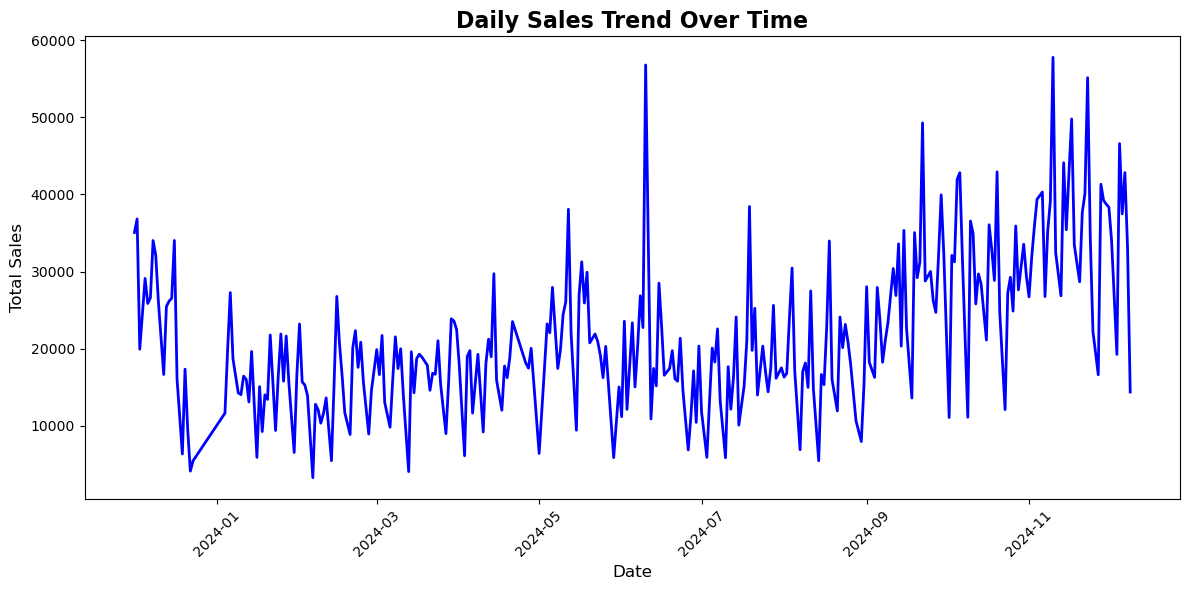

In [48]:
# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalPrice'], color='blue', linewidth=2)

# Labels & Title
plt.title('Daily Sales Trend Over Time', fontsize=16, fontweight="bold")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Resample monthly using the date column
monthly_sales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

# # Format the index for display (e.g., "Jan 2010")
monthly_sales.index = monthly_sales.index.strftime('%b %Y')

# Display the result
print(monthly_sales)

InvoiceDate
Dec 2023    453289.98
Jan 2024    374301.36
Feb 2024    357484.36
Mar 2024    461737.78
Apr 2024    366251.37
May 2024    524072.65
Jun 2024    494428.44
Jul 2024    453588.73
Aug 2024    466284.37
Sep 2024    718084.90
Oct 2024    763434.20
Nov 2024    951688.34
Dec 2024    265941.40
Name: TotalPrice, dtype: float64


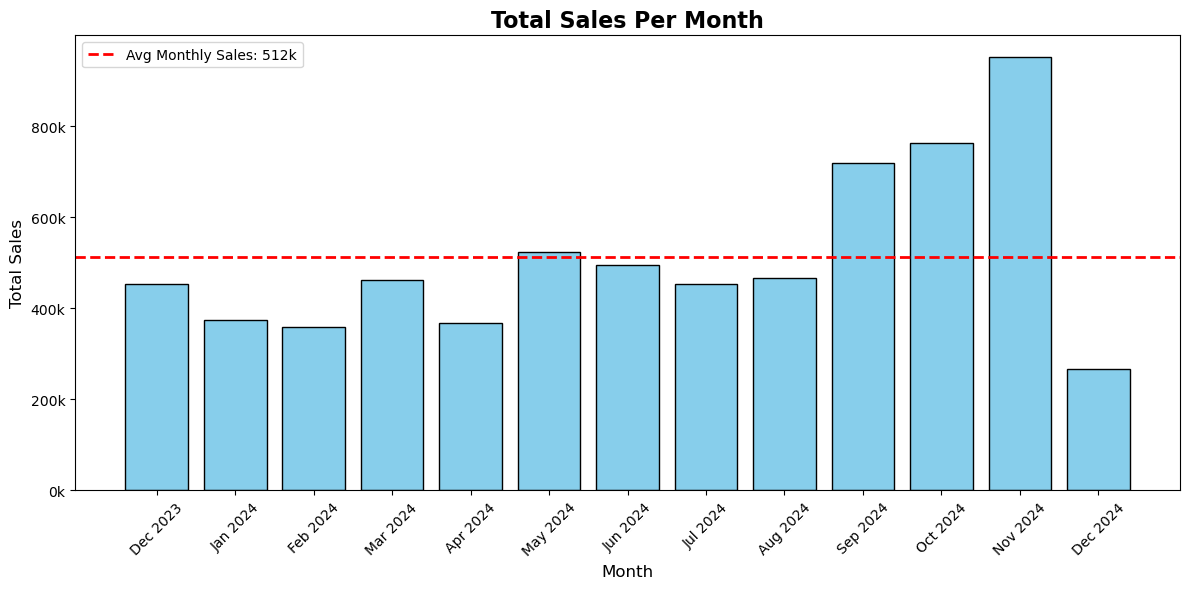

In [50]:
from matplotlib.ticker import FuncFormatter

# Resample monthly sales
monthly_sales = df.resample('M', on='InvoiceDate')["TotalPrice"].sum()

# Calculate average monthly sales
avg_sales = monthly_sales.mean()

# Format month labels (e.g., Jun 2024)
month_labels = monthly_sales.index.strftime('%b %Y')

# Y-axis formatter: convert to 'k'
def format_k(value, _):
    return f"{value/1000:.0f}k"

# Plot
plt.figure(figsize=(12, 6))
plt.bar(month_labels, monthly_sales.values, color="skyblue", edgecolor="black")

# Add average line
plt.axhline(y=avg_sales, color="red", linestyle="--", linewidth=2, label=f"Avg Monthly Sales: {avg_sales/1000:.0f}k")

# Apply formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_k))

plt.title("Total Sales Per Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- Total sales saw an upward trend in September, October, and December.

### Sales by Day

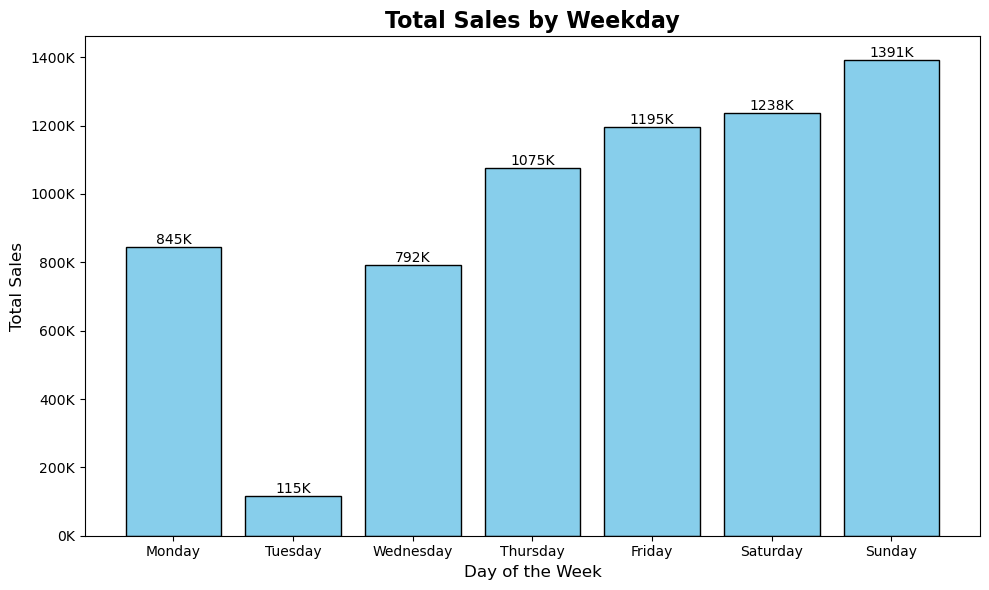

In [51]:
# Extract weekday name
df["Weekday"] = df["InvoiceDate"].dt.day_name()

# Aggregate sales by weekday in calendar order
weekday_sales = df.groupby("Weekday")["TotalPrice"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_sales.index, weekday_sales.values, color="skyblue", edgecolor="black")

# Labels & Title
plt.title("Total Sales by Weekday", fontsize=16, fontweight="bold")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Format y-axis in K
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x/1000:.0f}K")

# Show values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval/1000:.0f}K",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Lowest sales occurred on Tuesday (115K).
- From Wednesday onwards, sales showed an upward trend.
- Thursday to Sunday maintained strong momentum.
- Highest sales were recorded on Sunday (1,391K).

## Pareto Principle

In [52]:
# Calculate total sales per customer
customer_sales = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

# Calculate cumulative percentage of sales
cumulative_sales = customer_sales.cumsum()
total_sales = customer_sales.sum()
cumulative_percentage = 100 * cumulative_sales / total_sales

# Find the percentage of customers contributing to 80% of sales
pareto_cutoff = (cumulative_percentage <= 80).sum()
pareto_percentage_customers = pareto_cutoff / len(customer_sales) * 100

print(f"{pareto_percentage_customers:.2f}% of customers generate 80% of the sales.")

31.51% of customers generate 80% of the sales.


In [53]:
# Calculate total sales per product
product_sales = df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False)

# Calculate cumulative percentage of sales
cumulative_sales = product_sales.cumsum()
total_sales = product_sales.sum()
cumulative_percentage = 100 * cumulative_sales / total_sales

# Find the percentage of products contributing to 80% of sales
pareto_cutoff = (cumulative_percentage <= 80).sum()
pareto_percentage_products = pareto_cutoff / len(product_sales) * 100

print(f"{pareto_percentage_products:.2f}% of products generate 80% of the sales.")

23.75% of products generate 80% of the sales.


<br>

## RFM Analysis


- **Recency (R)**: 
    How recently a customer made a purchase.
- **Frequency (F)**: 
    How often a customer makes a purchase.
- **Monetory (M)**: 
    How much money a customer spends.

In [54]:
# Compute the latest date from the dataset
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [55]:
# Group by CustomerID and calculate RFM metrics
rfm_df = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "TotalPrice": "sum"  # Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

In [56]:
# Recency: lower is better → invert rank
rfm_df['R_rank'] = rfm_df['Recency'].rank(method='first', ascending=False)
rfm_df['R_percentile'] = rfm_df['R_rank'] / rfm_df['R_rank'].max()
rfm_df['R_Score'] = pd.cut(rfm_df['R_percentile'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[1, 2, 3, 4, 5]).astype(int)

# Frequency: higher is better
rfm_df['F_rank'] = rfm_df['Frequency'].rank(method='first', ascending=True)
rfm_df['F_percentile'] = rfm_df['F_rank'] / rfm_df['F_rank'].max()
rfm_df['F_Score'] = pd.cut(rfm_df['F_percentile'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[1, 2, 3, 4, 5]).astype(int)

# Monetary: higher is better
rfm_df['M_rank'] = rfm_df['Monetary'].rank(method='first', ascending=True)
rfm_df['M_percentile'] = rfm_df['M_rank'] / rfm_df['M_rank'].max()
rfm_df['M_Score'] = pd.cut(rfm_df['M_percentile'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[1, 2, 3, 4, 5]).astype(int)

# Drop intermediate columns
rfm_df.drop(columns=['R_rank', 'R_percentile', 'F_rank', 'F_percentile', 'M_rank', 'M_percentile'], inplace=True)

In [57]:
def rfm_segment(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Champions
    if R > 4 and F > 4:
        return 'Champions'
    
    # Loyal Customers
    elif (F >= 4 and R >= 3):
        return 'Loyal Customers'
    
    # Potential Loyalists
    elif (R >= 4 and (F >= 3 or M >= 3)):
        return 'Potential Loyalists'
    
    # Recent Customers
    elif (R > 4 and F < 3 and M < 3):
        return 'Recent Customers'
    
    # Lost 
    elif (R < 2 and F < 2):
        return 'Lost'
    
    # Default: At Risk
    else:
        return 'At Risk'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

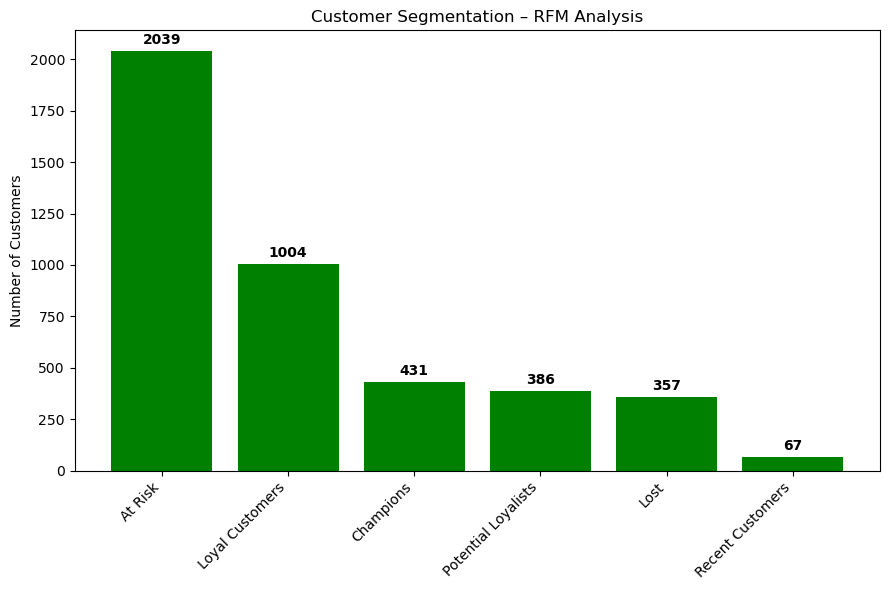

In [58]:
segment_counts = rfm_df["Segment"].value_counts()

plt.figure(figsize=(9, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color="green")

for bar, value in zip(bars, segment_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel("Number of Customers")
plt.title("Customer Segmentation – RFM Analysis")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

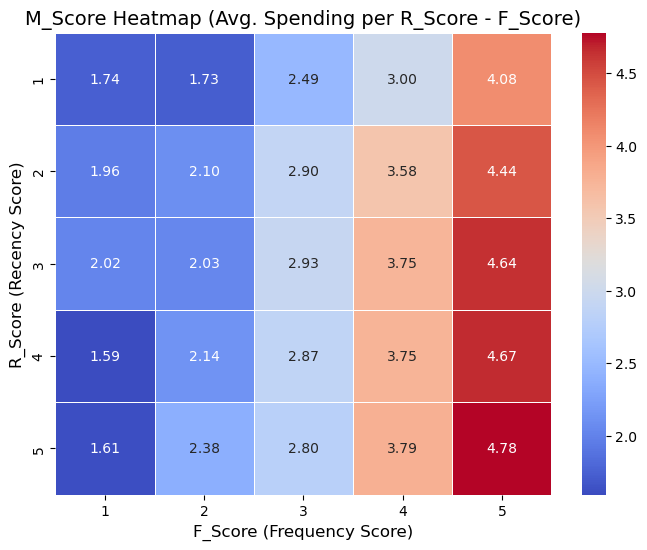

In [59]:
# Create Pivot Table for RFM Heatmap
rfm_pivot = rfm_df.pivot_table(
    index='R_Score',           # Recency on rows
    columns='F_Score',         # Frequency on columns
    values='M_Score',          # Monetary score as values
    aggfunc='mean',            # Take average for duplicates
    fill_value=0               # Fill missing with 0
)

# Plot Heatmap
plt.figure(figsize=(8, 6)) 
# Create heatmap (# Color scheme: blue(low) → red(high))
sns.heatmap(rfm_pivot, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Add Labels and Title
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)", fontsize=14)
plt.xlabel("F_Score (Frequency Score)", fontsize=12)
plt.ylabel("R_Score (Recency Score)", fontsize=12)

plt.show()

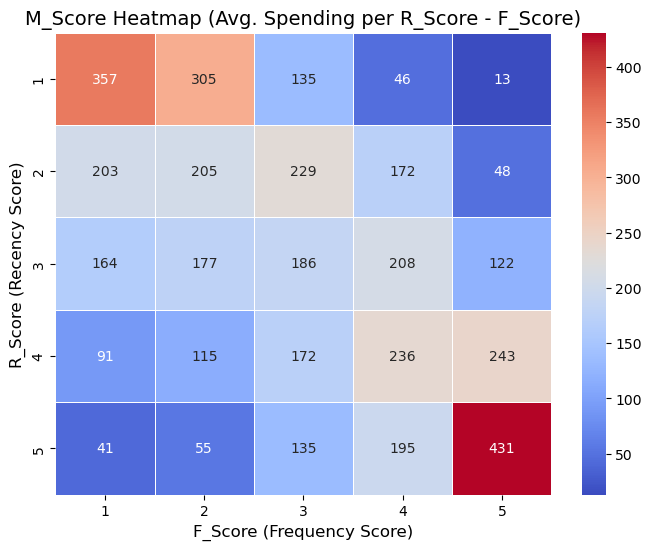

In [60]:
# Create Pivot Table for RFM Heatmap
rfm_pivot = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='CustomerID', aggfunc='count', fill_value=0)

# Plot Heatmap
plt.figure(figsize=(8, 6)) 
# Create heatmap (# Color scheme: blue(low) → red(high))
sns.heatmap(rfm_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Add Labels and Title
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)", fontsize=14)
plt.xlabel("F_Score (Frequency Score)", fontsize=12)
plt.ylabel("R_Score (Recency Score)", fontsize=12)

plt.show()

### Exporting File

In [61]:
df.to_csv("df_data", index=False)

In [62]:
rfm_df.to_csv("rfm_data.csv", index=False)

<br>

# Customer Retension & Churn Analysis

In [63]:
df_ = df.copy()
df_.shape

(384727, 10)

In [64]:
# Convert InvoiceDate to datetime
df_['InvoiceDate'] = pd.to_datetime(df_['InvoiceDate'])

# Extract Purchase Month (YYYY-MM)
df_['PurchaseMonth'] = df_['InvoiceDate'].dt.to_period('M')

# Step 3: Identify first purchase month per customer
first_purchase = (
    df_.groupby('CustomerID')['PurchaseMonth'].min().reset_index().rename(columns={'PurchaseMonth': 'FirstPurchaseMonth'}) )

# Merge with original data
df_ = df_.merge(first_purchase, on='CustomerID', how='left')

# Set churn threshold (e.g., 90 days of inactivity)
churn_threshold = 90

# Function to classify customer type
  # Compute the latest date from the dataset
latest_date = df_['InvoiceDate'].max() + pd.Timedelta(days=1)

def customer_type(row):
    # First month they purchased → New Customer
    if row['PurchaseMonth'] == row['FirstPurchaseMonth']:
        return 'New Customer'
    # If last purchase was more than threshold days ago → Churned Customer
    elif (latest_date - row['InvoiceDate']).days > churn_threshold:
        return 'Churned Customer'
    # Otherwise → Returning Customer
    else:
        return 'Returning Customer'

# Apply classification
df_['CustomerType'] = df_.apply(customer_type, axis=1)

df_.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Weekday,PurchaseMonth,FirstPurchaseMonth,CustomerType
322491,575491,23527,WALL ART ANIMALS AND NATURE,2,2024-11-09,3.75,15531.0,United Kingdom,7.50,Saturday,2024-11,2024-11,New Customer
9558,537489,21914,BLUE HARMONICA IN BOX,12,2023-12-07,1.25,17017.0,United Kingdom,15.00,Thursday,2023-12,2023-12,New Customer
332930,576339,22558,CLOTHES PEGS RETROSPOT PACK 24,1,2024-11-14,3.29,14096.0,United Kingdom,3.29,Thursday,2024-11,2024-08,Returning Customer
85969,547817,22663,JUMBO BAG DOLLY GIRL DESIGN,3,2024-03-25,1.95,17946.0,United Kingdom,5.85,Monday,2024-03,2024-03,New Customer
298283,573032,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2024-10-27,4.95,18211.0,United Kingdom,14.85,Sunday,2024-10,2024-03,Returning Customer


In [65]:
# Aggregate customer counts by month & type
customer_trends = (
    df_.groupby(['PurchaseMonth', 'CustomerType'])['CustomerID'].nunique().reset_index().rename(columns={'CustomerID': 'CustomerCount'}) )

# Convert month to string for plotting
customer_trends['PurchaseMonth'] = customer_trends['PurchaseMonth'].astype(str)

customer_trends.head(5)

,PurchaseMonth,CustomerType,CustomerCount
0,2023-12,New Customer,866
1,2024-01,Churned Customer,314
2,2024-01,New Customer,412
3,2024-02,Churned Customer,367
4,2024-02,New Customer,371


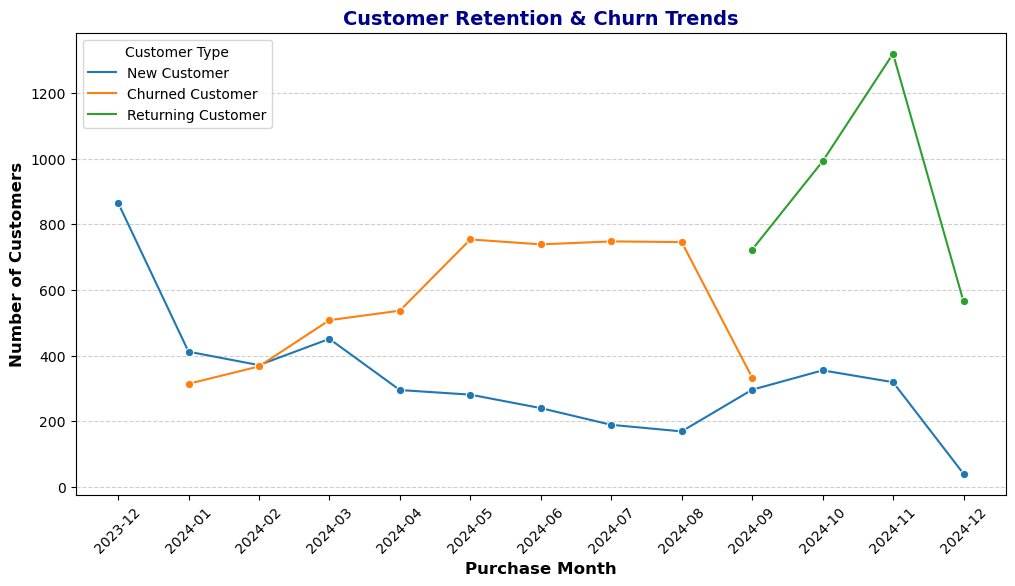

In [66]:
# Plot Customer Retention & Churn Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_trends, x='PurchaseMonth', y='CustomerCount', hue='CustomerType', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Purchase Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Retention & Churn Trends', fontsize=14, fontweight='bold', color='darkblue')
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

### Insights

- **Strong Acquisition but Weak Retention (Dec 2023 – Aug 2024)** – New customers peak in Dec 2023 (~860) but steadily decline till Aug 2024, while churned customers rise in the same period.


- **Major Retention Recovery (Sep – Nov 2024)** – From Sep 2024, churn drops sharply and returning customers surge, peaking in Nov (~1300), suggesting successful reactivation or seasonal effects.


- **Inverse Churn–Return Link** – Churn and returning customers show an inverse relationship, indicating effective win-back strategies.


- **Year-End Slowdown (Dec 2024)** – All customer types fall in Dec 2024, possibly due to incomplete data or reduced demand.